In [42]:
import pandas as pd 
import networkx as nx 
import numpy as np 

In [212]:
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'routes.dat?raw=true',
    names=names,
    header=None)
routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [213]:
names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')
airports = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'airports.dat?raw=true',
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports

,id,name,city,country,icao,lat,lon,alt,timezone,dst,tz,type,source
iata,,,,,,,,,,,,,
GKA,1,Goroka Airport,Goroka,Papua New Guinea,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
MAG,2,Madang Airport,Madang,Papua New Guinea,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
HGU,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
LAE,4,Nadzab Airport,Nadzab,Papua New Guinea,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
POM,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RUG,12053,Rugao Air Base,Rugao,China,ZSRG,32.257885,120.501656,0,NaN,NaN,NaN,airport,OurAirports
WHU,12054,Wuhu Air Base,Wuhu,China,ZSWU,31.390600,118.408997,0,NaN,NaN,NaN,airport,OurAirports
SXJ,12055,Shanshan Airport,Shanshan,China,ZWSS,42.911701,90.247498,0,NaN,NaN,NaN,airport,OurAirports


In [250]:
ir_airports=airports[airports['country']=='Iran']
ir_airports

,id,name,city,country,icao,lat,lon,alt,timezone,dst,tz,type,source
iata,,,,,,,,,,,,,
ABD,2097,Abadan Airport,Abadan,Iran,OIAA,30.371099,48.228298,10,3.5,E,Asia/Tehran,airport,OurAirports
NaN,2098,Dezful Airport,Dezful,Iran,OIAD,32.434399,48.397598,474,3.5,E,Asia/Tehran,airport,OurAirports
NaN,2099,Aghajari Airport,Aghajari,Iran,OIAG,30.744400,49.677200,88,3.5,E,Asia/Tehran,airport,OurAirports
NaN,2100,Gachsaran Airport,Gachsaran,Iran,OIAH,30.337601,50.827999,2414,3.5,E,Asia/Tehran,airport,OurAirports
QMJ,2101,Shahid Asyaee Airport,Masjed Soleiman,Iran,OIAI,32.002399,49.270401,1206,3.5,E,Asia/Tehran,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PGU,7546,Persian Gulf International Airport,Khalije Fars,Iran,OIBP,27.379601,52.737701,27,3.5,U,Asia/Tehran,airport,OurAirports
YES,7547,Yasouj Airport,Yasuj,Iran,OISY,30.700500,51.545101,5939,3.5,U,Asia/Tehran,airport,OurAirports
KNR,11903,Jam Airport,Kangan,Iran,OIBJ,27.820499,52.352200,2173,NaN,NaN,NaN,airport,OurAirports


In [251]:
routes_us = route[
    route['source'].isin(ir_airports.index) &
    route['dest'].isin(ir_airports.index)]
routes_us

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
14343,B9,543,ABD,2097,MHD,4331,NaN,0,M82
14344,B9,543,ABD,2097,THR,2131,NaN,0,M82
14345,B9,543,AWZ,2104,IFN,2121,NaN,0,M82
14346,B9,543,AWZ,2104,KIH,2109,NaN,0,M82
14347,B9,543,AWZ,2104,MHD,4331,NaN,0,M82
...,...,...,...,...,...,...,...,...,...
66020,Y9,3148,THR,2131,AWZ,2104,NaN,0,TU3
66021,Y9,3148,THR,2131,KIH,2109,NaN,0,M80
66022,Y9,3148,THR,2131,MHD,4331,NaN,0,M80
66023,Y9,3148,THR,2131,MRX,2103,NaN,0,M80 TU3


In [270]:
graph=routes_us[['source','dest']].to_numpy()
graph

array([['ABD', 'MHD'],
       ['ABD', 'THR'],
       ['AWZ', 'IFN'],
       ['AWZ', 'KIH'],
       ['AWZ', 'MHD'],
       ['AWZ', 'SRY'],
       ['AWZ', 'SYZ'],
       ['AWZ', 'THR'],
       ['AZD', 'MHD'],
       ['BND', 'MHD'],
       ['IFN', 'AWZ'],
       ['IFN', 'MHD'],
       ['KIH', 'AWZ'],
       ['KIH', 'SYZ'],
       ['KSH', 'MHD'],
       ['KSH', 'THR'],
       ['MHD', 'ABD'],
       ['MHD', 'AWZ'],
       ['MHD', 'AZD'],
       ['MHD', 'BND'],
       ['MHD', 'IFN'],
       ['MHD', 'KSH'],
       ['MHD', 'RAS'],
       ['MHD', 'SRY'],
       ['MHD', 'SYZ'],
       ['MHD', 'TBZ'],
       ['MHD', 'THR'],
       ['MHD', 'ZAH'],
       ['RAS', 'MHD'],
       ['SRY', 'AWZ'],
       ['SRY', 'MHD'],
       ['SYZ', 'AWZ'],
       ['SYZ', 'KIH'],
       ['SYZ', 'MHD'],
       ['SYZ', 'THR'],
       ['TBZ', 'MHD'],
       ['TBZ', 'THR'],
       ['THR', 'ABD'],
       ['THR', 'AWZ'],
       ['THR', 'KSH'],
       ['THR', 'MHD'],
       ['THR', 'SYZ'],
       ['THR', 'TBZ'],
       ['ZA

In [271]:
g=nx.from_edgelist(graph)
g

In [272]:
import matplotlib.pyplot as plt 

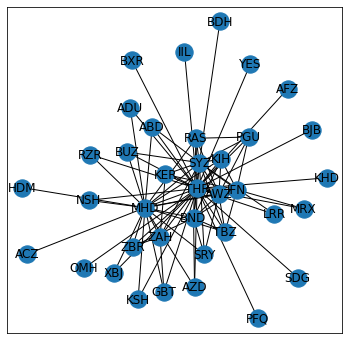

In [273]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g)

In [274]:
ranks=nx.pagerank_numpy(g,alpha=0.9)
ranks

{'ABD': 0.01719232918381569,
 'MHD': 0.11671718214217085,
 'THR': 0.1823641481243445,
 'AWZ': 0.04945300952633824,
 'IFN': 0.050487899708177464,
 'KIH': 0.030670276402209932,
 'SRY': 0.020997373762476765,
 'SYZ': 0.0815260622259338,
 'AZD': 0.017089753570894723,
 'BND': 0.05479546584462918,
 'KSH': 0.01260648818360687,
 'RAS': 0.030812502080654367,
 'TBZ': 0.030670276402209932,
 'ZAH': 0.03226568520500741,
 'ACZ': 0.007477496517609689,
 'ADU': 0.01260648818360687,
 'AFZ': 0.007831694368699875,
 'PGU': 0.026034092512113215,
 'BJB': 0.007831694368699875,
 'BUZ': 0.01719232918381567,
 'BXR': 0.007831694368699875,
 'GBT': 0.017446340964357994,
 'HDM': 0.007477496517609689,
 'IIL': 0.007831694368699875,
 'KER': 0.021801299123395724,
 'LRR': 0.01241753536890866,
 'NSH': 0.01260648818360687,
 'RZR': 0.01260648818360687,
 'ZBR': 0.021929606351645814,
 'OMH': 0.007831694368699875,
 'PFQ': 0.007831694368699875,
 'SDG': 0.007831694368699875,
 'YES': 0.007831694368699871,
 'BDH': 0.007288543702911

In [275]:
sorted(ranks.items(),reverse=True,key=lambda item:item[1])

[('THR', 0.1823641481243445),
 ('MHD', 0.11671718214217085),
 ('SYZ', 0.0815260622259338),
 ('BND', 0.05479546584462918),
 ('IFN', 0.050487899708177464),
 ('AWZ', 0.04945300952633824),
 ('ZAH', 0.03226568520500741),
 ('RAS', 0.030812502080654367),
 ('KIH', 0.030670276402209932),
 ('TBZ', 0.030670276402209932),
 ('PGU', 0.026034092512113215),
 ('ZBR', 0.021929606351645814),
 ('KER', 0.021801299123395724),
 ('SRY', 0.020997373762476765),
 ('GBT', 0.017446340964357994),
 ('ABD', 0.01719232918381569),
 ('BUZ', 0.01719232918381567),
 ('AZD', 0.017089753570894723),
 ('KSH', 0.01260648818360687),
 ('ADU', 0.01260648818360687),
 ('NSH', 0.01260648818360687),
 ('RZR', 0.01260648818360687),
 ('XBJ', 0.01260648818360687),
 ('LRR', 0.01241753536890866),
 ('MRX', 0.012375605342435864),
 ('AFZ', 0.007831694368699875),
 ('BJB', 0.007831694368699875),
 ('BXR', 0.007831694368699875),
 ('IIL', 0.007831694368699875),
 ('OMH', 0.007831694368699875),
 ('PFQ', 0.007831694368699875),
 ('SDG', 0.0078316943686

In [276]:
google_rank=nx.google_matrix(g,alpha=0.9)
rold=nx.to_numpy_matrix(g)
for i in range(10):
    A=nx.google_matrix(g)
    rnew=rold*A
    if np.sum(np.abs(rold-rnew))<0.3:
        break
    rold=rnew
    g=nx.to_networkx_graph(rnew)

In [292]:
g_rank=nx.pagerank_numpy(nx.to_networkx_graph(rold),alpha=0.9)

In [295]:
rank_vect=np.array([[*g_rank.values()]])
best_score=np.argmax(rank_vect)

In [296]:
print("the hub is ",best_score)

the hub is  2
